In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import signal
import scipy.stats as stats

# One dimension FFT

### 1 Case of basic sinusoidal functions
Fourier transform basics, notion of FFT and shift

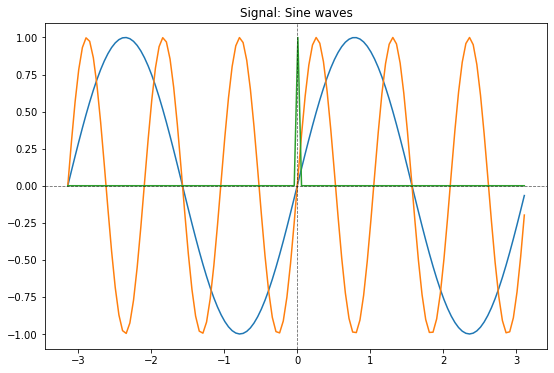

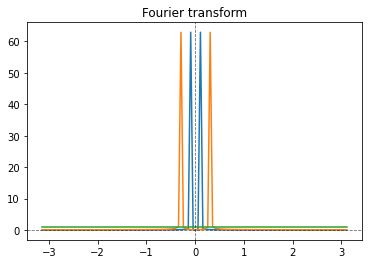

In [2]:
x = np.arange(-np.pi, np.pi, 0.05)
T1 = 2
T2 = 6
delta = signal.unit_impulse(np.shape(x),'mid')
y1 = np.sin(x*T1)
y2 = np.sin(x*T2)
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,delta)
plt.title('Signal: Sine waves')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.show()

TF_y1 =np.fft.fftshift(np.fft.fft(y1))
TF_y2 =np.fft.fftshift(np.fft.fft(y2))
TF_delta =np.fft.fftshift(np.fft.fft(delta))

plt.plot(x,np.abs(TF_y1))
plt.plot(x,np.abs(TF_y2))
plt.plot(x,np.abs(TF_delta))
plt.title('Fourier transform')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.show()

### 2 Case of sum of sine waves
Concept of spectrum

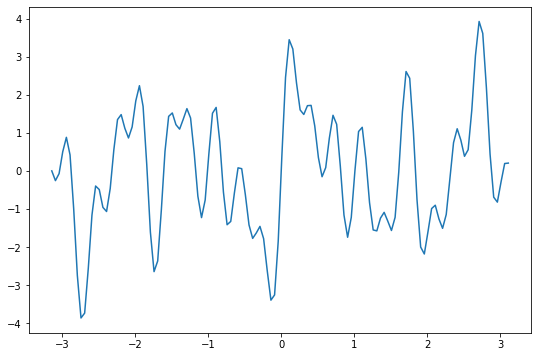

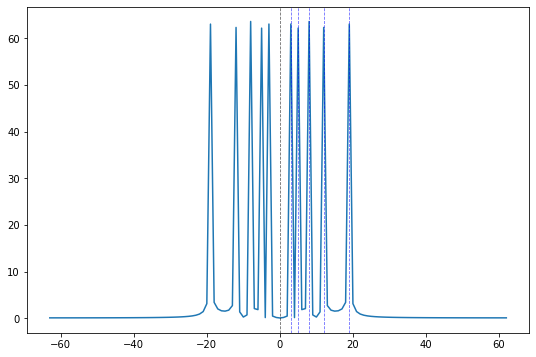

In [3]:
T = [3,5,8,12,19]
signal = np.sin(x*T[0]) +  np.sin(x*T[1]) + np.sin(x*T[2]) + np.sin(x*T[3]) + np.sin(x*T[4])
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(x,signal)
plt.show()

TF_signal =np.fft.fftshift(np.fft.fft(signal))
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(x_f,np.abs(TF_signal))
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=T[0], color='b', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=T[1], color='b', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=T[2], color='b', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=T[3], color='b', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=T[4], color='b', ls = '--', lw=0.8, alpha=0.6)
plt.show()

### 3 Case of pure noise
Concept of denoising

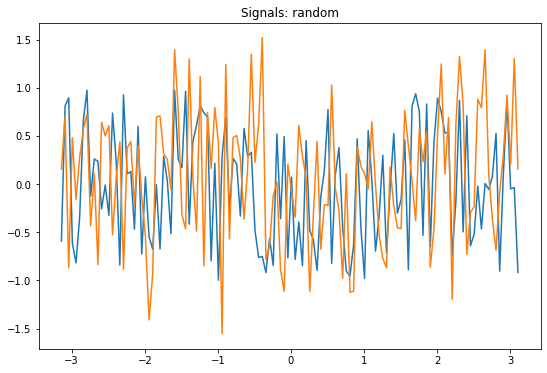

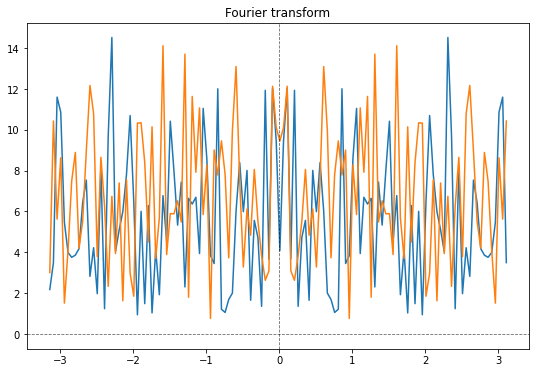

In [4]:
x = np.arange(-np.pi, np.pi, 0.05)
noise_u = np.random.uniform(-1,1,np.shape(x))
noise_g = np.random.normal(0,1/(np.sqrt(2)),np.shape(x))
fig, ax = plt.subplots(figsize=(9,6))
plt.title('Signals: random')
plt.plot(x,noise_u)
plt.plot(x,noise_g)
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
TF_nu =np.fft.fftshift(np.fft.fft(noise_u))
TF_ng =np.fft.fftshift(np.fft.fft(noise_g))
plt.title('Fourier transform')
plt.plot(x,np.abs(TF_nu))
plt.plot(x,np.abs(TF_ng))
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.show()

### 4 Case of different apertures 
Concept of apodization

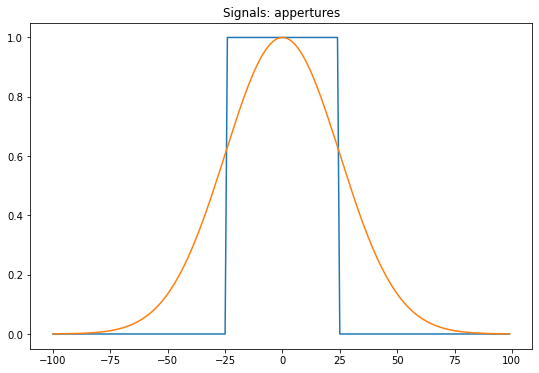

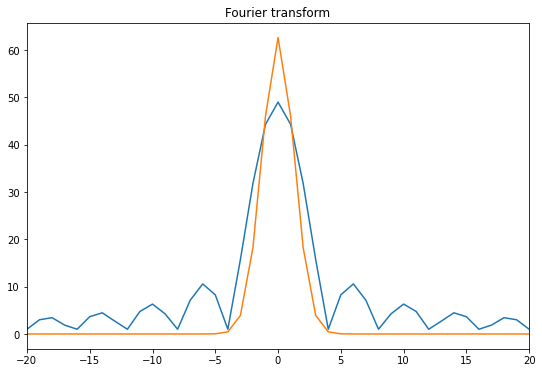

In [5]:
apperture_dim = 200
aperture_sz = 50

fig, ax = plt.subplots(figsize=(9,6))
#Door profile
signal_x = np.arange(apperture_dim)-apperture_dim//2 #abcisse centree en 0
signal_y = (np.abs(signal_x) < aperture_sz/2.) #signal fonction porte
plt.plot(signal_x,signal_y)
#Gaussian profile
mu = 0
sigma = np.sqrt(aperture_sz/2.)**2.
gauss = stats.norm.pdf(signal_x, mu, sigma)
gauss_y = gauss/np.max(gauss)
plt.title('Signals: appertures')
plt.plot(signal_x, gauss_y)
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
#Door profile
TF_signal_y = np.fft.fftshift(np.fft.fft(signal_y))
plt.plot(signal_x,np.abs(TF_signal_y))
#Gaussian profile
TF_gauss_y = np.fft.fftshift(np.fft.fft(gauss_y))
plt.title('Fourier transform')
plt.plot(signal_x,np.abs(TF_gauss_y))
ax.set_xlim([-20,20])
plt.show()

# Two dimension FFT

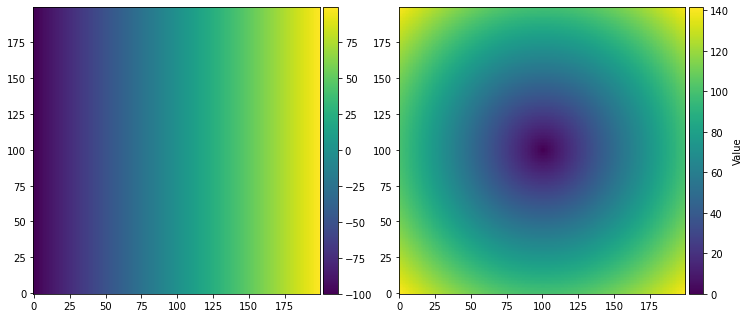

In [6]:
apperture_dim = 200 #equivalent to varying the wavelength
fig = plt.figure(1, figsize=(12,20))
gs = gridspec.GridSpec(1,2)

#Gradiant in the x-direction
x_2d_array,y_2d_array = np.meshgrid(signal_x,signal_x)
y_2d_array.shape
ax = plt.subplot(gs[0,0]) 
im = ax.imshow(x_2d_array, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#Gradiant circular
r=np.sqrt(x_2d_array**2+y_2d_array**2)
ax = plt.subplot(gs[0,1]) 
im = ax.imshow(r, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax, label='Value')


AttributeError: 'numpy.ndarray' object has no attribute 'correlate2d'

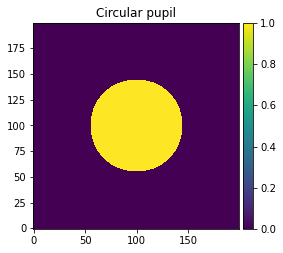

In [7]:
aperture_sz = 90
#note: minimum must be Npix // 2 else sampling problems in OTF from PSF :-)
fig = plt.figure(1, figsize=(15,9))
gs = gridspec.GridSpec(2,3,height_ratios=[1,1], width_ratios=[1,1,1])
gs.update(left=0.01, right=0.95, bottom=0.02, top=0.75, wspace=0.3, hspace=0.30)

#0- Definition pupil
pupil = (r < aperture_sz/2.)
pupc = pupil+1j*(pupil*0.)
ax = plt.subplot(gs[0,0]) 
plt.title('Circular pupil')
im = ax.imshow(pupil, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#1- Autocorrelation of the pupil
corr = signal.correlate2d(pupc, pupc)
corr_real = np.real(corr)
ax = plt.subplot(gs[1,0]) 
im = ax.imshow(corr_real, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('OTF: Autocorrelation of the pupil')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#2- Building the PSF 
psf = np.abs(np.fft.fftshift(np.fft.fft2(pupil)))**2 
psf_norm = psf/np.max(psf)
ax = plt.subplot(gs[0,1]) 
im = ax.imshow(np.log(psf_norm), cmap='viridis', origin='lower',interpolation='nearest')
plt.title('PSF (normalized)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#3- OTF via PSF
otf_psf = np.fft.fftshift(np.fft.fft2(psf/np.max(psf)))
mtf_psf = np.abs(otf_psf)
ax = plt.subplot(gs[1,1]) 
im = ax.imshow(np.abs(otf_psf), cmap='viridis', origin='lower',interpolation='nearest')
plt.title('OTF: TF of the PSF')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#4- Profile of the PSF
resolution = 1.22*apperture_dim/aperture_sz
x_sup = np.arange(-apperture_dim//2,apperture_dim//2)
prof_psf = psf_norm[apperture_dim//2,:]
ax = plt.subplot(gs[0,2]) 
plt.title('Profile of the PSF')
ax.semilogy(x_sup,prof_psf,label='Resolution: {0:.2f} px'.format(resolution))
plt.legend(frameon=False)
plt.axvline(x=resolution, color='r', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=-resolution, color='r', ls = '--', lw=0.8, alpha=0.6)
plt.ylim([1/1e6,1.0])

#6- Profile of the OTF from the PSF
prof_otf = mtf_psf[apperture_dim//2,:]
ax2 = plt.subplot(gs[1,2]) 
plt.title('Profile of the OTF')
#ax2.semilogx(x_sup,prof_otf,label='Resolution: {0:.2f} px'.format(aperture_sz))
ax2.plot(x_sup,prof_otf/np.max(prof_otf),label='Resolution: {0:.2f} px'.format(aperture_sz))
plt.legend(frameon=False)
#plt.xlim([1.0,apperture_dim//2])
plt.ylim([0,1])
plt.axvline(x=aperture_sz, color='r', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='black', ls = '--', lw=0.8, alpha=0.6)

#6- Profile of the OTF from the autocorrelation
corr_real_crop = corr_real[(apperture_dim-1)//2:(apperture_dim)*3//2-1,(apperture_dim-1)//2:(apperture_dim)*3//2-1]
prof_acorr = corr_real_crop[apperture_dim//2,:]
ax2.plot(x_sup,prof_acorr/np.max(prof_acorr),label='Resolution: {0:.2f} px'.format(aperture_sz),ls='--')
plt.axvline(x=aperture_sz, color='g', ls = '--', lw=0.8, alpha=0.6)

plt.legend(frameon=False)

print(np.sum(pupil))
print(np.max(otf_psf))

# Fonction pupille

In [ ]:
def pupille(r,Nx,Ny):
   P = zeros((Ny,Nx))
   nx=Nx/2
   ny=Ny/2
   for k in range(Nx):
       for m in range(Ny):
           if pow((k-nx)*(k-nx)+(m-ny)*(m-ny),0.5) < r:
               P[m,k] = 1.0
   return P

def circle_mask(im, xc, yc, rcirc):
    """Create a circular aperture centered on (xc, yc) with radius rcirc."""
    x, y = np.shape(im)
    newy, newx = np.mgrid[:y,:x]
    circ = (newx-xc)**2 + (newy-yc)**2 < rcirc**2
    return circ.astype('float')

In [ ]:
#Notes: add centre and occ en option
#Do the same plot as before as a function with pupil in input
#OTF => make the circular profile and compare
#Normalize by sum(pupil)

In [ ]:
otf = np.fft.fftshift(np.fft.fft2(psf))
print(np.sum(pupil))
print(np.sum(psf))
print(np.sum(psf/(np.sum(pupil))**2))
print(np.sum(otf))

In [ ]:
image = plt.imread('/Users/fcantalloube/Desktop/Penguin_fly_sq_bw.png').astype(float)
plt.subplot(231, title='Original Image')

plt.imshow(image,cmap='bone')

fft_image = np.fft.fft2(image)
ampl = np.real(fft_image)
plt.subplot(232, title='Amplitude')
plt.imshow(np.fft.fftshift(ampl),cmap='bone')

phase = np.imag(fft_image)
plt.subplot(233, title='Phase')
plt.imshow(phase,cmap='bone')

fft_inv = np.fft.ifft2(fft_image)
plt.subplot(234, title='Inverse FT')
plt.imshow(np.abs(fft_inv),cmap='bone')

fft_iamp = np.fft.ifft2(np.real(fft_image))
plt.subplot(235, title='Inverse Amplitude')
plt.imshow(np.abs(fft_iamp),cmap='bone')

fft_iph = np.fft.ifft2(np.imag(fft_image))
plt.subplot(236, title='Inverse Phase')
plt.imshow(np.abs(fft_iph),cmap='bone')


In [ ]:
fft_image = np.fft.fftshift(np.fft.fft2(image))
ampl = np.real(fft_image)
phase = np.imag(fft_image)

#plt.imshow(ampl)

plt.imshow(phase)

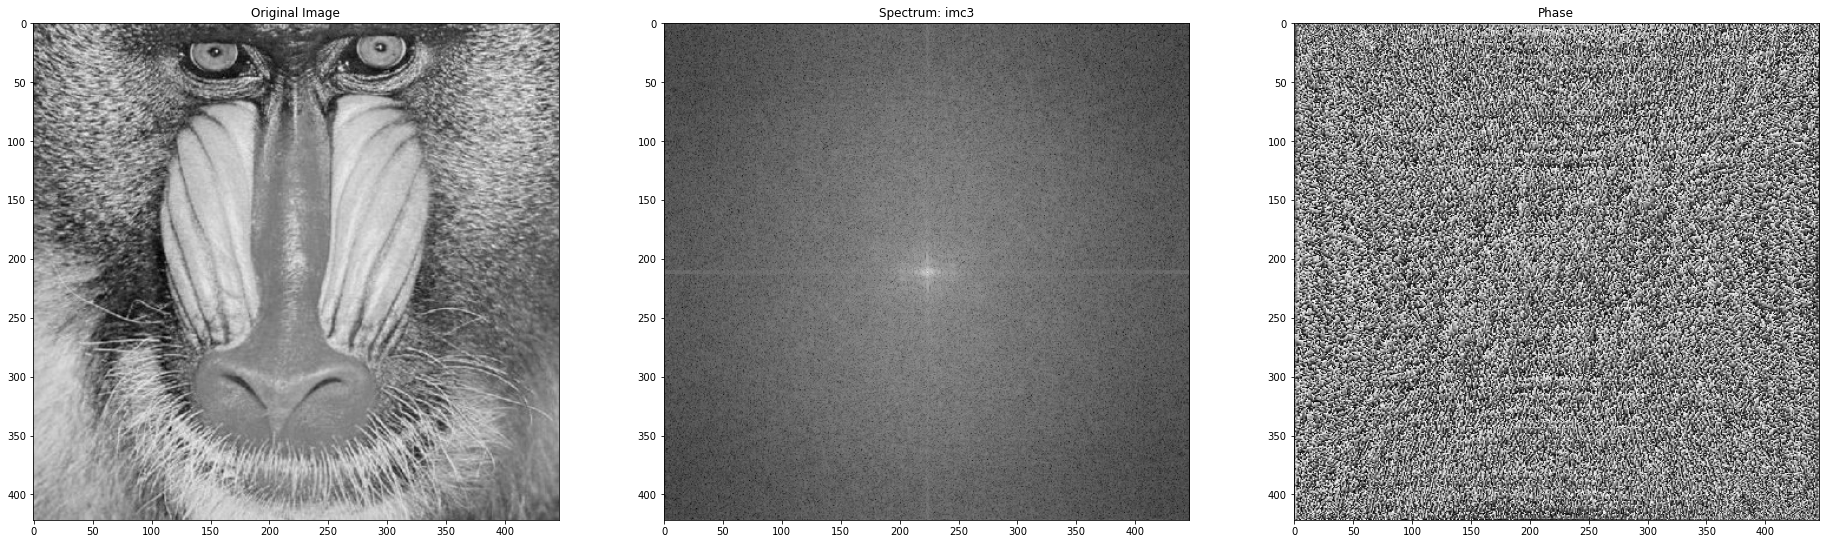

In [20]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
#Users/fcantalloube/Desktop/Penguin_fly_sq_bw.jpg
img_c1 = cv2.imread("./mandrill.jpg", 0)
#img_c1 = plt.imread('/Users/fcantalloube/Desktop/Penguin_fly_sq_bw.png').astype(float)

img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
#img_c4 = np.fft.ifftshift(img_c3)
#img_c5 = np.fft.ifft2(img_c4)

plt.subplot(231), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(232), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Spectrum: imc3")
plt.subplot(233), plt.imshow(np.angle(img_c2), "gray"), plt.title("Phase")
#plt.subplot(233), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
#plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
#plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()


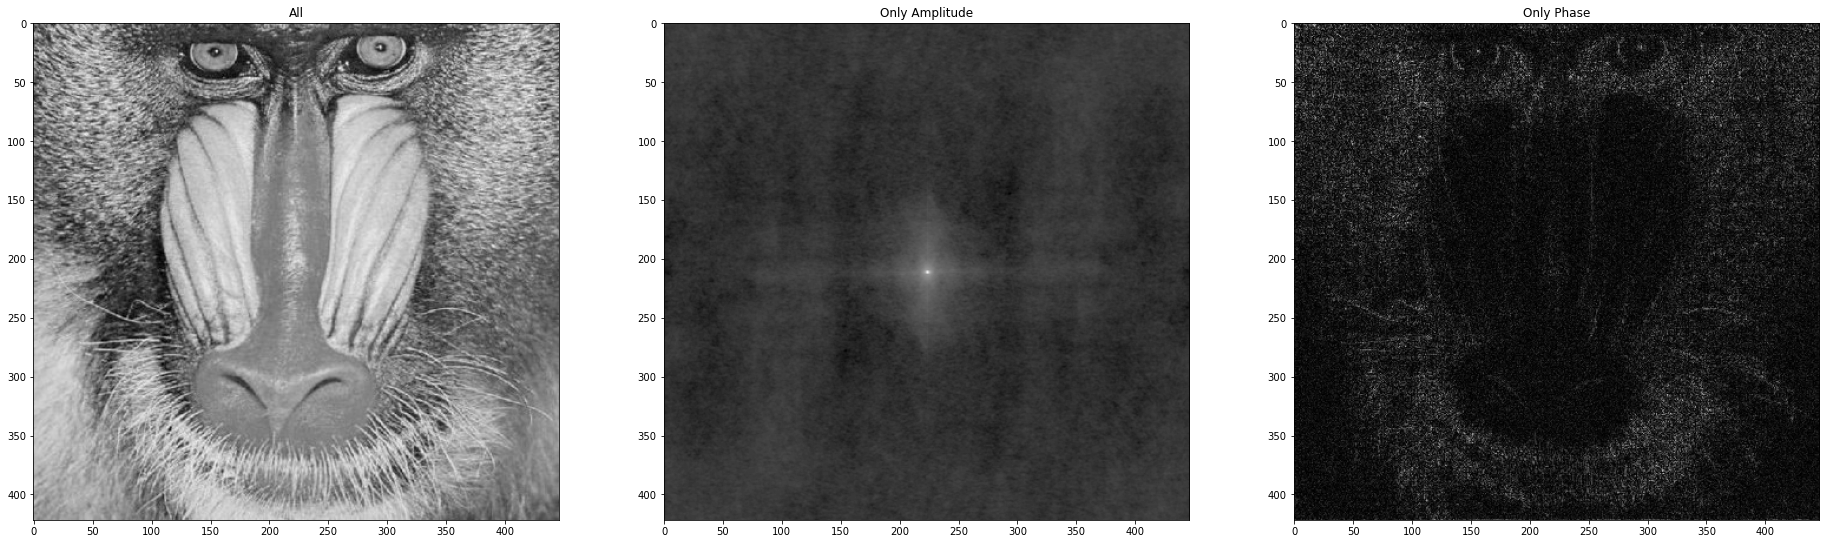

In [18]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c9 = np.fft.ifft2(np.real(img_c2)+np.complex(0,1)*np.imag(img_c2))
img_c8 = np.fft.ifft2(np.abs(img_c2)*np.exp(np.complex(0,1)*np.angle(img_c2)))

###
img_c6 = np.fft.ifftshift (np.fft.ifft2( ( np.abs(img_c2) )))

img_c7 = np.fft.ifft2(np.fft.ifftshift (np.exp(np.complex(0,1)*np.angle(img_c2))))

plt.subplot(231), plt.imshow(np.abs(img_c8), "gray"), plt.title("All")
plt.subplot(232), plt.imshow(np.power(np.abs(img_c6),0.01), "gray"), plt.title("Only Amplitude")
plt.subplot(233), plt.imshow(np.abs(img_c7), "gray"), plt.title("Only Phase")
plt.show()





In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_back = np.fft.fft2(img_c6)

plt.subplot(231), plt.imshow(np.log10(np.abs(img_c3)), "gray"), plt.title("Only Amplitude")
plt.subplot(232), plt.imshow(np.log10(np.abs(img_back)), "gray"), plt.title("Only Amplitude")

